Example for the deconvolution in the fitting method of pyspectrum, 
this can be later improved by better fitting proccedure

In [9]:
from pyspectrum import Spectrum, FindPeaksDomain, FindPeaksCenters, Convolution, Calibration
from pyspectrum.peak_identification.peaks_fit import GaussianWithBGFitting
import xarray as xr
from pyspectrum.peak_identification.utils import gaussian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat, nominal_value, std_dev

# Loading a new spectrum
The spectrum is of Eu152, and there was not calibration yet.

In [15]:
path = './spectra/152Eu_calsource_10cm_85ks.txt'
spectrum = pd.read_csv(path, names=['counts'])
spectrum['channel'] = spectrum.index 
spectrum = Spectrum.from_dataframe(spectrum, energy_calibration_poly=np.poly1d([0.29239695, 7.10512435]))

Text(0.5, 0, 'counts')

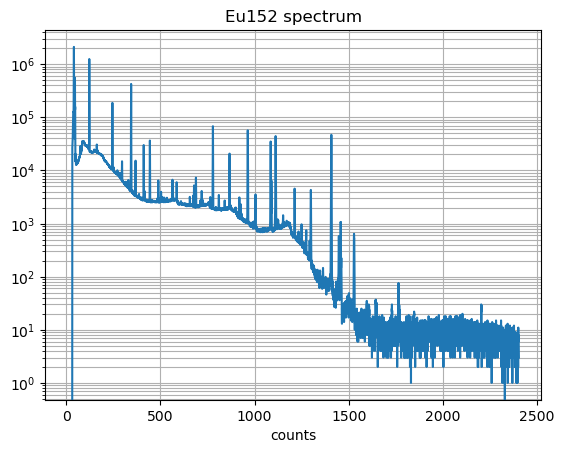

In [16]:
# for zoom and stuff
spectrum.xr_spectrum().plot(yscale='log')
plt.grid(True, which='both')
plt.title('Eu152 spectrum')
plt.xlabel('channel')
plt.xlabel('counts')

In [17]:
gf = GaussianWithBGFitting()

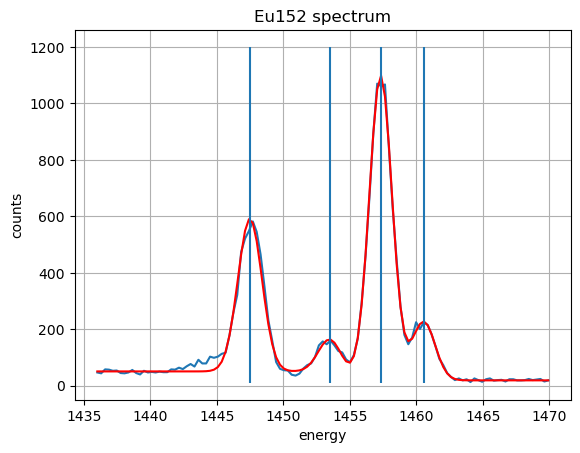

In [18]:
overLap = spectrum.xr_spectrum().sel(energy=slice(1436, 1470))
overLap_fwhm = lambda x: 2.249
overLap = Spectrum(overLap.values, np.array(range(len(overLap.values))), energy_calibration_poly=np.poly1d([0.29239695, 1436]), fwhm_calibration=overLap_fwhm)
overLap.xr_spectrum().plot()#yscale='log')
plt.grid(True, which='both')
plt.title('Eu152 spectrum')
plt.xlabel('energy')
plt.ylabel('counts')
fp = FindPeaksCenters(overLap.xr_spectrum(), smoothing_sigma=fwhm(overLap.xr_spectrum().energy.values[0])/2/(2*np.sqrt(2*np.log(2))), prominence=20)
p = fp()
fit = gf.gaussian_fitting(overLap.xr_spectrum(), peaks_centers=p, estimated_fwhm=fwhm(overLap.xr_spectrum().energy.values[0]), background_parameters=[ufloat(40.0,0), ufloat(10.0, 0)])
gf.plot_fit(overLap.xr_spectrum().coords['energy'], fit)
for i in range(4):
    plt.vlines(ymax=1200, ymin=10, x=fit['curvefit_coefficients'][3*i+1])